# 1.

In [1]:
import numpy as np
import forces as forces
import leapfrog as leapfrog

In [2]:
# define an array of masses in kilograms
masses1 = np.array([10, 100])

# define a list of position arrays in meters
positions1 = np.array([np.array([0, 0, 0]), np.array([1, 0, 0])])

We know that the force vectors between the two masses should be (10 * 100 * G)/(1)**2, or about 6.67e-8

In [3]:
forces.calculateForceVectors(masses1, positions1)

[array([6.67e-08, 0.00e+00, 0.00e+00]),
 array([-6.67e-08,  0.00e+00,  0.00e+00])]

Looks like I was right!

# 2.

In [4]:
leapfrog.updateParticles??

Signature: leapfrog.updateParticles(masses, positions, velocities, dt)
Source:   
def updateParticles(masses, positions, velocities, dt):
    """
    Evolve particles in time via leap-frog integrator scheme. This function
    takes masses, positions, velocities, and a time step dt as

    Parameters
    ----------
    masses : np.ndarray
        1-D array containing masses for all particles, in kg
        It has length N, where N is the number of particles.
    positions : np.ndarray
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    velocities : np.ndarray
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    dt : float
        Evolve system for time dt (in seconds).

    Returns
    -------
    Updated particle positions and particle velocities, each being a 2-D
    array with shape (N, 3), where N is the number of particles.


In [5]:
# define an array of velocity vectors
velocities1 = np.array([np.array([0, 0, 0]), np.array([0, 0, 0])])

With these velocities and the defined masses and positions, it should take a LONG time for them to collide. 

In [6]:
leapfrog.updateParticles(masses1, positions1, velocities1, 1e6)

(array([[3335. ,    0. ,    0. ],
        [-332.5,    0. ,    0. ]]),
 array([[ 0.003335 ,  0.       ,  0.       ],
        [-0.0003335,  0.       ,  0.       ]]))

After a million seconds, the particles still haven't collided!

# 3.

In [7]:
def calculateTrajectories(m, p, v, t, dt):
    '''
    Calculates the trajectories of objects interacting based on initial conditions
    
    Parameters
    ----------
        m : 1D list or array of masses, corresponding to the particle masses, in kilogramss
        p : 2D array of initial positions of the particles, in meters
        v : 2D arry of initial velocites of the particles, in meters/second
        t : total time to evolve the system, in seconds
        dt : the size of each time step, in seconds
        
    Returns
    -------
        An array of timestamps that we calculated the new positions and velocities of the objects at. 
        
        A 3D array of particle numbers, positions, and the time point.
        
        A 3D array of particle numbers, velocities, and the time point.
    '''
    # define a resize tuple
    resize = (1, len(p), 3)
    
    # define empty arrays and lists for times, positions, and velocities
    timeArray = np.array([0])
    positionArray = np.resize(p, resize)
    velocityArray = np.resize(v, resize)
    
    # calculate the number of time points
    nTimes = t / dt
    
    # find the timestamp values and append them to timeArray
    for i in range(int(nTimes)):
        timeArray = np.append(timeArray, (i + 1) * dt)
        
    # update the particles for each time point
    for i in range(int(nTimes)):
        # define the output of updateParticles as an array
        update = np.array(leapfrog.updateParticles(m, positionArray[-1], velocityArray[-1], dt))
        
        updatedPositions = update[0, :, :]
        updatedVelocities = update[1, :, :]
        
        # reshape updatedPositions and updatedVelocities with specific shape
        reshape = (1, len(p), 3)
        posReshape = np.reshape(updatedPositions, reshape)
        velReshape = np.reshape(updatedVelocities, reshape)
        
        # append the updated position values to positionList
        positionArray = np.append(positionArray, posReshape, axis=0)
        
        # append the updated velocity values to velocityList
        velocityArray = np.append(velocityArray, velReshape, axis=0)
        
        # define another resize tuple so our array have dimensions (nTimes X nParticles X nDimensions)
        resize1 = (i + 2, len(p), 3)
        
        # reshape positionArray
        positionArray = np.resize(positionArray, resize1)
        
        # reshape velocityArray
        velocityArray = np.resize(velocityArray, resize1)
        
    # print all the lists
    return timeArray, positionArray, velocityArray

# 4.

In [8]:
# be able to convert from AU to meters
mPerAU = 1.496e+11

# be able to convert from days to seconds
sPerDay = 86400

# define an array of Sun and Earth masses in kilograms
esMass = np.array([1.989e30, 5.972e24])

# define an array of Sun and Earth positions in meters
esPos = np.array([np.array([-3e-6, 0, 0]) * mPerAU, np.array([0.999997, 0, 0]) * mPerAU])

# define an array of Sun and Earth velocities in meters/second
esVel = np.array([np.array([0, -8.94e-2, 0]), np.array([0, 2.98e4, 0])])

# test calculateTrajectories with these arrays
calculatedTime, calculatedPosition, calculatedVelocity = calculateTrajectories(esMass, esPos, esVel, (1000 * sPerDay), (0.1 * sPerDay)) # converting 1000 days and 0.1 days to seconds

# 5.

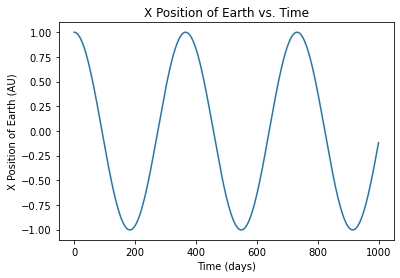

In [9]:
# import plotting modules
import matplotlib.pyplot as plt
%matplotlib inline

# plot x positions array vs. time array
# convert back to AU and days
plt.plot((calculatedTime / sPerDay), (calculatedPosition[:, 1, 0] / mPerAU))

# label axes
plt.xlabel('Time (days)')
plt.ylabel('X Position of Earth (AU)')

# title plot
plt.title('X Position of Earth vs. Time');

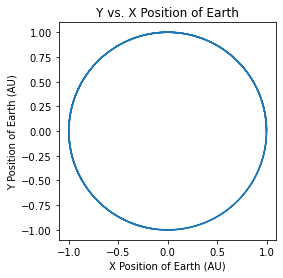

In [10]:
# plot y positions array vs. x position array
# convert back to AU
plt.plot(calculatedPosition[:, 1, 0] / mPerAU, calculatedPosition[:, 1, 1] / mPerAU)

# label axes
plt.xlabel('X Position of Earth (AU)')
plt.ylabel('Y Position of Earth (AU)')

# title plot
plt.title('Y vs. X Position of Earth')

# scale the axes
plt.axis('scaled');

The Earth's orbit appears to be a perfect circle, so it looks like I did it right!

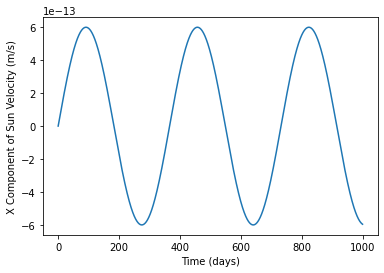

In [11]:
# plot Sun x velocity array vs. time array
# convert back to AU and days
plt.plot((calculatedTime / sPerDay), (calculatedVelocity[:, 0, 0] / mPerAU))

# label axes
plt.xlabel('Time (days)')
plt.ylabel('X Component of Sun Velocity (m/s)');

Based on this plot, we would need to measure the radial velocity of a Sun-like star with precision of about 1e-12 to be able to detect an Earth-like planet orbiting it.

# 6.

In [12]:
# repeat Earth-Sun calculation with reduced velocities
reducedTime, reducedPosition, reducedVelocity = calculateTrajectories(esMass, esPos, (esVel / 2), (1000 * sPerDay), (0.1 * sPerDay)) # converting 1000 days and 0.1 days to seconds

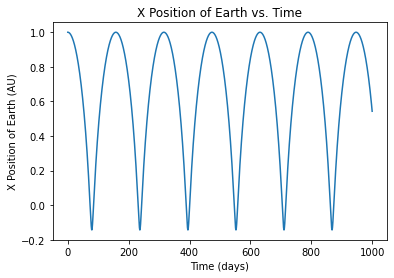

In [13]:
# plot x positions array vs. time array of reduced simulation
# convert back to AU and days
plt.plot((reducedTime / sPerDay), (reducedPosition[:, 1, 0] / mPerAU))

# label axes
plt.xlabel('Time (days)')
plt.ylabel('X Position of Earth (AU)')

# title plot
plt.title('X Position of Earth vs. Time');

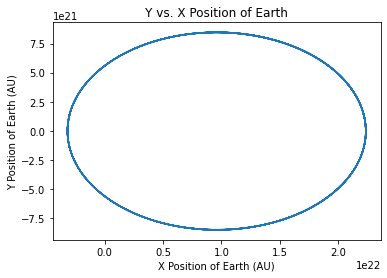

In [14]:
# plot y positions array vs. x position array of reduced simulation
# convert back to AU
plt.plot(reducedPosition[:, 1, 0] * mPerAU, reducedPosition[:, 1, 1] * mPerAU)

# label axes
plt.xlabel('X Position of Earth (AU)')
plt.ylabel('Y Position of Earth (AU)')

# title plot
plt.title('Y vs. X Position of Earth')

# scale the axes
plt.axis('scaled');

The orbit became MUCH more elliptical, which makes sense because we decreased the initial velocity!

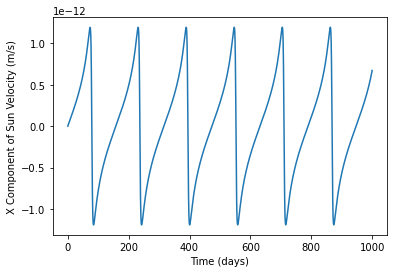

In [15]:
# plot Sun x velocity array vs. time array with reduced velocities
# convert back to AU and days
plt.plot((reducedTime / sPerDay), (reducedVelocity[:, 0, 0] / mPerAU))

# label axes
plt.xlabel('Time (days)')
plt.ylabel('X Component of Sun Velocity (m/s)');

# 7.

In [16]:
# import the file reading package
import pandas as pd

# read kepler16 into the notebook
kepler16 = pd.read_csv('kepler16.txt', comment = '#', names = ['mass (kg)', 'x (m)', 'y (m)', 'z (m)', 'vx (m/s)', 'vy (m/s)', 'vz (m/s)'], sep = '\s+')

# look at the table, make sure I did it right!
kepler16

mass (kg)         x (m)       y (m)         z (m)  vx (m/s)  vy (m/s)  \
0  1.371800e+30  7.634900e+09   -965870.0  1.844700e+09   -1050.2   -6.8224   
1  4.028700e+29 -2.599800e+10   3288900.0 -6.281300e+09    3576.0   23.2310   
2  6.325000e+26  3.776100e+10 -40923000.0  8.193400e+10  -36298.0  -10.8120   

   vz (m/s)  
0   13030.0  
1  -44368.0  
2   17020.0

Looks good!

# 8.

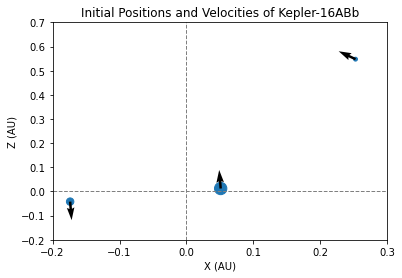

In [17]:
# plot initial x position array vs. initial z position array in AU
plt.scatter((kepler16['x (m)'] / mPerAU), (kepler16['z (m)'] / mPerAU), s = ((kepler16['mass (kg)'] / 1e28) + 15)) # this is a weird way to account for mass, but it works!!

# label axes
plt.xlabel('X (AU)')
plt.ylabel('Z (AU)')

# title plot
plt.title('Initial Positions and Velocities of Kepler-16ABb')

# plot arrows with a for loop
for i in range(len(kepler16['x (m)'])):
    plt.quiver(np.array((kepler16['x (m)'])[i] / mPerAU), np.array((kepler16['z (m)'])[i] / mPerAU), np.array((kepler16['vx (m/s)'])[i] / mPerAU), np.array((kepler16['vz (m/s)'])[i] / mPerAU))
    
# set x and y limits
plt.ylim(-0.2, 0.7)
plt.xlim(-0.2, 0.3)

# put dotted lines on the origin just to make it look nice :)
plt.axhline(0, c='gray', ls='--', lw=1)
plt.axvline(0, c='gray', ls='--', lw=1);

# 9.

In [18]:
# define an array for particle masses
keplerMass = np.array(kepler16['mass (kg)'])

# define empty position and velocity arrays
keplerPos = np.array([])
keplerVel = np.array([])

# define a resizing tuple
resizeKepler = (len(kepler16['x (m)']), 3)

# write for loop to create easy-to-work-with position and velocity arrays
for i in range(len(kepler16['x (m)'])):
    # append values to position and velocity arrays
    keplerPos = np.append(keplerPos, np.array([(kepler16['x (m)'])[i], (kepler16['y (m)'])[i], (kepler16['z (m)'])[i]]))
    keplerVel = np.append(keplerVel, np.array([(kepler16['vx (m/s)'])[i], (kepler16['vy (m/s)'])[i], (kepler16['vz (m/s)'])[i]]))
    
# resize the position and velocity arrays to make them easy-to-work-with
keplerPos = np.resize(keplerPos, resizeKepler)
keplerVel = np.resize(keplerVel, resizeKepler)

# print the final position and velocity arrays to make sure they match the kepler data
print(keplerPos)
print(keplerVel)

[[ 7.6349e+09 -9.6587e+05  1.8447e+09]
 [-2.5998e+10  3.2889e+06 -6.2813e+09]
 [ 3.7761e+10 -4.0923e+07  8.1934e+10]]
[[-1.0502e+03 -6.8224e+00  1.3030e+04]
 [ 3.5760e+03  2.3231e+01 -4.4368e+04]
 [-3.6298e+04 -1.0812e+01  1.7020e+04]]


Everything matches!

In [19]:
# use calculate trajectories with the Kepler-16ABb data
# evolve system for 500 days, converted to seconds
# use time step of 0.5 days, converted to seconds
keplerCalcTime, keplerCalcPos, keplerCalcVel = calculateTrajectories(keplerMass, keplerPos, keplerVel, (500 * sPerDay), (0.5 * sPerDay))

# 10.

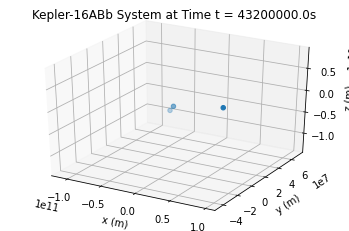

In [20]:
# use the matplotlib.animation package
import matplotlib.animation as ani

# pull out the movie-maker class
FFMpegWriter = ani.writers['ffmpeg']

# create a movie write object, set frames per second
writer = FFMpegWriter(fps=30)

# create a blank figure object (e.g. blank piece of paper)
fig = plt.figure()

# define 3d axis
ax = plt.axes(projection='3d')

# attach the writer to our figure "fig",
# save it to "kepler16.mp4", 
# with a resolution of 100 dots per inch (dpi)
with writer.saving(fig, "kepler16.mp4", 100):
    # make each scatter plot, and write it 
    for i in range(len(keplerCalcTime)):
        # clear the axes (= the plot rectangle)
        plt.cla()
        
        # set the x, y and z limits
        plt.xlim(np.min(keplerCalcPos[:, :, 0]), np.max(keplerCalcPos[:, :, 0]))
        plt.ylim(np.min(keplerCalcPos[:, :, 1]), np.max(keplerCalcPos[:, :, 1]))
        ax.set_zlim(np.min(keplerCalcPos[:, :, 2]), np.max(keplerCalcPos[:, :, 2]))
        
        # scatter plot the position of each particle in 3D
        ax.scatter3D(keplerCalcPos[i, :, 0], keplerCalcPos[i, :, 1], keplerCalcPos[i, :, 2])
        
        # title the plot
        plt.title(f'Kepler-16ABb System at Time t = {keplerCalcTime[i]}s')
        
        # label axes
        ax.set_xlabel('x (m)')
        ax.set_ylabel('y (m)')
        ax.set_zlabel('z (m)')
        
        # add the plot to the movie
        writer.grab_frame()

In [21]:
# import the video and embed so I can watch it!
from IPython.display import Video
Video("kepler16.mp4", embed=True)

# 11.

For the Choose-Your-Own-Adventure part, I want to use the planetesimalDisk data and visualize it in 4 dimensions by creating an animation and having the camera swivel as time passes. I think this will work best with the planetesimalDisk data because there are a lot of particles, which I think should look pretty cool as the particles interact and the camera swivels.

In [22]:
# read planetesimalDisk into the notebook
planetesimalDisk = pd.read_csv('planetesimalDisk.txt', comment = '#', names = ['mass (kg)', 'x (m)', 'y (m)', 'z (m)', 'vx (m/s)', 'vy (m/s)', 'vz (m/s)'], sep = '\s+')

# look at the table, make sure I did it right!
planetesimalDisk

mass (kg)         x (m)         y (m)  z (m)  vx (m/s)  vy (m/s)  \
0   1.989000e+30 -0.000000e+00  0.000000e+00   -0.0      -0.0      -0.0   
1   1.989000e+20 -9.847100e+10  1.935800e+10   -0.0   -7015.5  -35687.0   
2   1.989000e+20  9.234600e+09  1.028900e+11   -0.0  -35704.0    3204.6   
3   1.989000e+20  6.130800e+10 -9.151400e+10    0.0   28841.0   19321.0   
4   1.989000e+20 -5.512200e+10 -1.184900e+11    0.0   28897.0  -13443.0   
5   1.989000e+20 -9.736500e+09 -4.889500e+10    0.0   50608.0  -10078.0   
6   1.989000e+20  6.961200e+10  9.739000e+10   -0.0  -27091.0   19364.0   
7   1.989000e+20 -1.205400e+10  7.579700e+10   -0.0  -41073.0   -6531.8   
8   1.989000e+20 -4.464500e+10 -9.251500e+10   -0.0   32376.0  -15624.0   
9   1.989000e+20  7.702800e+10 -1.079800e+10   -0.0    5734.9   40912.0   
10  1.989000e+20  1.793500e+10 -6.717700e+10    0.0   42216.0   11271.0   
11  1.989000e+20 -1.005800e+10 -5.073900e+10   -0.0   49692.0   -9850.3   
12  1.989000e+20 -2.630400e+10  4.171000e+10   -0.0  -43886.0  -27677.0   
13  1.989000e+20  3.747200e+10  3.242700e+10    0.0  -33868.0   39138.0   
14  1.989000e+20  1.218300e+11  4.100400e+10    0.0  -10250.0   30456.0   
15  1.989000e+20 -6.015300e+10  9.326600e+10   -0.0  -29064.0  -18745.0   
16  1.989000e+20  1.067900e+11 -6.943700e+10    0.0   17598.0   27064.0   
17  1.989000e+20  4.571300e+10  2.176200e+10    0.0  -22010.0   46234.0   
18  1.989000e+20 -3.467200e+10  1.049100e+11    0.0  -32911.0  -10877.0   
19  1.989000e+20  6.465000e+10 -3.675700e+10    0.0   20882.0   36728.0   
20  1.989000e+20 -7.829200e+10 -1.751700e+10   -0.0    8881.5  -39696.0   
21  1.989000e+20  5.475300e+09  1.396700e+11    0.0  -30794.0    1207.2   
22  1.989000e+20 -8.017100e+10 -1.321200e+10   -0.0    6572.3  -39882.0   
23  1.989000e+20  5.215400e+10  5.986200e+10    0.0  -30830.0   26861.0   
24  1.989000e+20  9.504900e+10 -2.205000e+10    0.0    8335.5   35931.0   
25  1.989000e+20 -6.256400e+10 -1.626300e+10   -0.0   11401.0  -43858.0   
26  1.989000e+20  6.773000e+10 -2.717400e+10   -0.0   15881.0   39583.0   
27  1.989000e+20 -3.409900e+10  1.235100e+11    0.0  -31027.0   -8566.2   
28  1.989000e+20  1.040100e+11 -6.587200e+10   -0.0   17569.0   27741.0   
29  1.989000e+20  8.005700e+10 -6.783600e+10    0.0   22994.0   27136.0   

    vz (m/s)  
0       0.00  
1    1476.00  
2    -113.54  
3    1108.90  
4    -324.28  
5     573.92  
6    -352.36  
7    1331.70  
8   -2041.50  
9     958.19  
10  -1368.60  
11   -831.45  
12  -1672.80  
13   1038.90  
14  -1465.80  
15   1330.50  
16   -618.54  
17   -214.71  
18    575.36  
19   -250.50  
20   -172.89  
21     35.94  
22   -582.21  
23    650.24  
24    172.42  
25    449.07  
26    820.04  
27   -107.24  
28    513.48  
29  -1049.90

In [23]:
# define an array for particle masses
diskMass = np.array(planetesimalDisk['mass (kg)'])

# define empty position and velocity arrays
diskPos = np.array([])
diskVel = np.array([])

# define a resizing variable
resizeDisk = (len(planetesimalDisk['mass (kg)']), 3)

# write for loop to create easy-to-work-with position and velocity arrays
for i in range(len(planetesimalDisk['mass (kg)'])):
    # append values to position and velocity arrays
    diskPos = np.append(diskPos, np.array([(planetesimalDisk['x (m)'])[i], (planetesimalDisk['y (m)'])[i], (planetesimalDisk['z (m)'])[i]]))
    diskVel = np.append(diskVel, np.array([(planetesimalDisk['vx (m/s)'])[i], (planetesimalDisk['vy (m/s)'])[i], (planetesimalDisk['vz (m/s)'])[i]]))
    
# resize the position and velocity arrays to make them easy-to-work-with
diskPos = np.resize(diskPos, resizeDisk)
diskVel = np.resize(diskVel, resizeDisk)

In [24]:
# use calculate trajectories with the planetesimalDisk data
# evolve system for 500 days, converted to seconds
# use time step of 0.1 days, converted to seconds
diskCalcTime, diskCalcPos, diskCalcVel = calculateTrajectories(diskMass, diskPos, diskVel, (500 * sPerDay), (0.1 * sPerDay))

# 12.

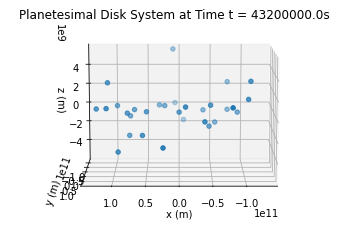

In [25]:
# create a new movie write object, set frames per second
writerDisk = FFMpegWriter(fps=200)

# create a blank figure object
figDisk = plt.figure()

# define 3d axis
axDisk = plt.axes(projection='3d')

# attach the writer to our figure "figDisk",
# save it to "planetesimalDisk.mp4", 
# with a resolution of 100 dots per inch
with writerDisk.saving(figDisk, "planetesimalDisk.mp4", 100):
    # make each scatter plot, and write it 
    for i in range(len(diskCalcTime)):
        # clear the axes
        plt.cla()
        
        # change the view depending on time, starting from 0 degrees and ending at 90 degrees 
        axDisk.view_init(10, (90 / len(diskCalcTime)) * i)
        
        # set the x, y and z limits depending on their max/mins
        plt.xlim(np.min(diskCalcPos[:, :, 0]), np.max(diskCalcPos[:, :, 0]))
        plt.ylim(np.min(diskCalcPos[:, :, 1]), np.max(diskCalcPos[:, :, 1]))
        axDisk.set_zlim(np.min(diskCalcPos[:, :, 2]), np.max(diskCalcPos[:, :, 2]))
        
        # scatter plot the position of each particle in 3D
        axDisk.scatter3D(diskCalcPos[i, :, 0], diskCalcPos[i, :, 1], diskCalcPos[i, :, 2])
        
        # title the plot
        plt.title(f'Planetesimal Disk System at Time t = {diskCalcTime[i]}s')
        
        # label axes
        axDisk.set_xlabel('x (m)')
        axDisk.set_ylabel('y (m)')
        axDisk.set_zlabel('z (m)')
        
        # add the plot to the movie
        writerDisk.grab_frame();

In [26]:
# import the video and embed so I can watch it!
Video("planetesimalDisk.mp4", embed=True)